In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EDA + CLEANING THE DATASET

In [225]:
df = pd.read_csv("technicalTestDataOps.csv")
df.head(10)

,id_customer,merchant_name,id_order,order_date,order_total_paid,order_delivery_fee,order_total_promo,order_tip,order_delivery_zipcode
0,3,uber eats,32365242,2018-11-23,21.57,3.50,0.0,0.0,35000
1,4,uber eats,22209093,2016-05-20,0.00,0.00,10.0,NaN,75008
2,12,deliveroo,4470,2016-07-26,26.74,2.50,10.0,0.0,75013
3,12,deliveroo,40412038,2019-01-31,31.46,2.19,0.0,0.0,75013
4,12,just eat,32299564,2018-11-19,NaN,NaN,0.0,NaN,75013
5,12,just eat,34133930,2018-12-16,NaN,NaN,0.0,NaN,75013
6,12,just eat,39191703,2019-01-20,NaN,NaN,0.0,NaN,75013
7,12,just eat,39195278,2018-11-01,NaN,NaN,0.0,NaN,75013
8,12,just eat,39195280,2018-10-24,NaN,NaN,0.0,NaN,75013
9,12,just eat,39195282,2018-10-15,NaN,NaN,0.0,NaN,75013


In [226]:
df_copy = df.copy()
df.tail()

,id_customer,merchant_name,id_order,order_date,order_total_paid,order_delivery_fee,order_total_promo,order_tip,order_delivery_zipcode
702378,2385102,deliveroo,46187136,2017-04-06,35.63,2.5,0.0,0.0,75003
702379,2385102,deliveroo,46187159,2017-01-24,30.96,2.5,0.0,0.0,75008
702380,2385102,deliveroo,46187189,2016-11-08,28.64,2.5,0.0,1.0,75008
702381,2385106,deliveroo,46187662,2018-07-30,40.02,2.5,0.0,0.0,75016
702382,2385108,uber eats,46188647,2019-02-09,31.71,3.9,0.0,0.0,75012


In [227]:
print(f'The data set have {df.shape[0]} rows and {df.shape[1]} columns')

The data set have 702383 rows and 9 columns


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702383 entries, 0 to 702382
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id_customer             702383 non-null  int64  
 1   merchant_name           702383 non-null  object 
 2   id_order                702383 non-null  int64  
 3   order_date              702383 non-null  object 
 4   order_total_paid        579798 non-null  float64
 5   order_delivery_fee      579798 non-null  float64
 6   order_total_promo       702383 non-null  float64
 7   order_tip               410235 non-null  float64
 8   order_delivery_zipcode  698684 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 48.2+ MB


In [229]:
df.isnull().sum()

id_customer                    0
merchant_name                  0
id_order                       0
order_date                     0
order_total_paid          122585
order_delivery_fee        122585
order_total_promo              0
order_tip                 292148
order_delivery_zipcode      3699
dtype: int64

Using the copy of the dataset
ToDo :
    Convert order_date to datetime
    Drop the zipcode column
    Normaly we should remove rows that the order_total_paid is null but to answer the first question i would have to just change the null values to 0
    Replace null values in the order_tip with 0
    See the result of the changes then decide what to do next

In [230]:
df_copy['order_date'] = pd.to_datetime(df_copy['order_date'])

In [231]:
df_copy.drop(columns=['order_delivery_zipcode'], inplace=True)

In [232]:
df_copy['order_total_paid'].fillna(0, inplace=True)
df_copy['order_tip'].fillna(0, inplace=True)
df_copy['order_delivery_fee'].fillna(0, inplace=True)

In [233]:
print(f'The data set have {df_copy.shape[0]} rows and {df_copy.shape[1]} columns')

The data set have 702383 rows and 8 columns


In [234]:
df_copy.isnull().sum()

id_customer           0
merchant_name         0
id_order              0
order_date            0
order_total_paid      0
order_delivery_fee    0
order_total_promo     0
order_tip             0
dtype: int64

Result :
    Now we have no null values in the dataset
ToDo :
    Check if theres any duplicated rows

In [235]:
duplicates = df_copy[df_copy.duplicated()]
duplicates

,id_customer,merchant_name,id_order,order_date,order_total_paid,order_delivery_fee,order_total_promo,order_tip


Result :
    No duplicated rows in the dataset
ToDo :
    See the summary statistics for numerical columns in the dataset
    to verify if all the values are logical

In [236]:
df_copy.describe()

,id_customer,id_order,order_date,order_total_paid,order_delivery_fee,order_total_promo,order_tip
count,7.023830e+05,7.023830e+05,702383,702383.000000,702383.000000,702383.000000,702383.000000
mean,1.080156e+06,2.822688e+07,2018-03-16 16:07:35.833356032,20.271653,1.979026,0.409641,0.093732
min,3.000000e+00,5.300000e+01,2015-01-01 00:00:00,-1.000000,0.000000,0.000000,0.000000
25%,1.572040e+05,1.382613e+07,2017-09-23 00:00:00,12.280000,0.000000,0.000000,0.000000
50%,9.844830e+05,3.363208e+07,2018-06-03 00:00:00,18.750000,2.500000,0.000000,0.000000
75%,2.164328e+06,3.943640e+07,2018-11-25 00:00:00,27.890000,2.500000,0.000000,0.000000
max,2.385108e+06,4.620295e+07,2019-04-01 00:00:00,646.350000,6.500000,563.000000,11.000000
std,9.087561e+05,1.406618e+07,NaN,15.458079,1.232397,2.195441,0.425735


Result :
    The 4 columns {order_date, order_delivery_fee, order_total_promo,order_tip} the statistics are coherent
    For the order_total_paid we have 1 incoherent values :
        min = -1
    we could justify this incoherent value if we assume that the customer received an order_total_promo > order_total
    So theres no outliers in our dataset so we don't need to remove them

ToDo :
    No need to move to further analysis
    So i will move to answer the first question using Matplotlib in python 

The Question :
    1. Compute the market share per merchant per month for 2018 (in terms of number of
    orders).


C:\Users\Oussama\AppData\Local\Temp\ipykernel_23984\1524240910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['order_month'] = df_2018['order_date'].dt.month


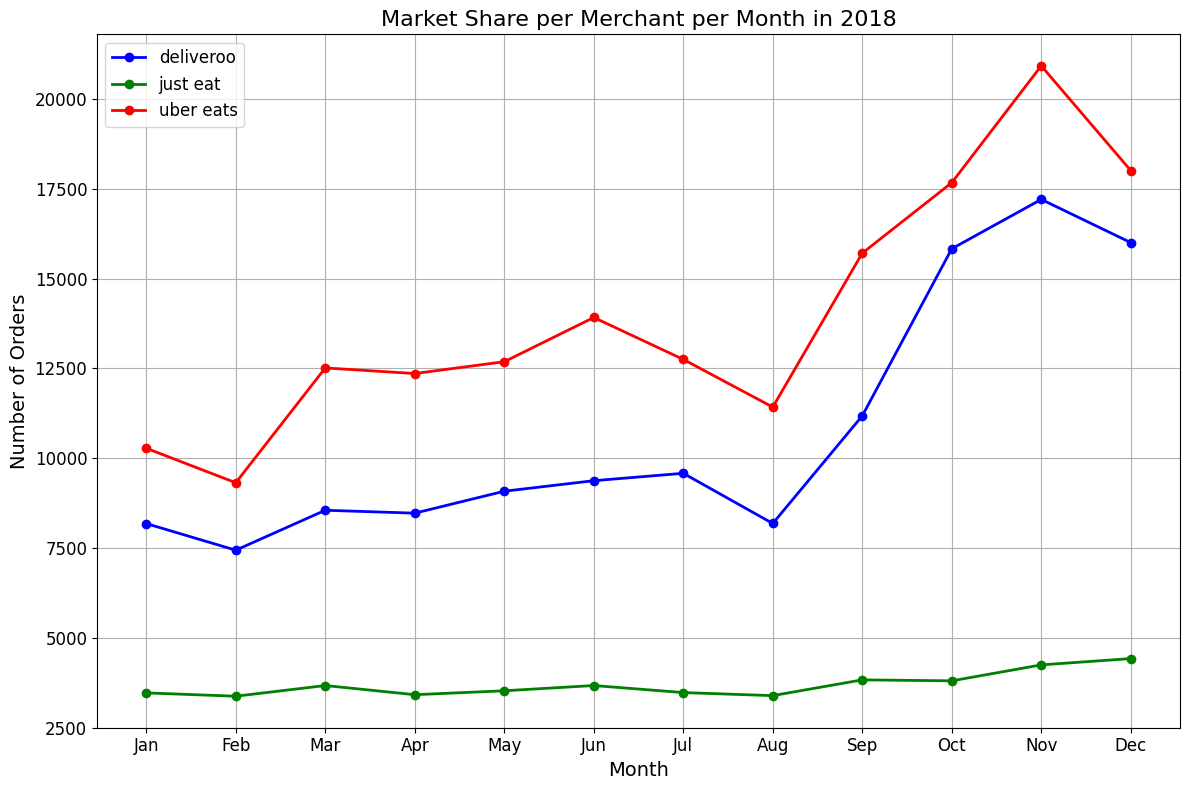

In [237]:
# Filter orders for the year 2018
df_2018 = df_copy[df_copy['order_date'].dt.year == 2018]

# Extract month from order_date
df_2018['order_month'] = df_2018['order_date'].dt.month

# Group by merchant_name and order_month, count the number of orders
market_share = df_2018.groupby(['merchant_name', 'order_month']).size().reset_index(name='order_count')

# Get unique merchants
merchants = market_share['merchant_name'].unique()

# Define colors for each merchant
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Plot market share per merchant per month
plt.figure(figsize=(12, 8))

# Iterate over unique merchants
for i, merchant in enumerate(merchants):
    # Filter data for the merchant
    merchant_data = market_share[market_share['merchant_name'] == merchant]
    # Plot market share over months with a different color for each merchant
    plt.plot(merchant_data['order_month'], merchant_data['order_count'], marker='o', linestyle='-', linewidth=2, label=merchant, color=colors[i])

plt.title('Market Share per Merchant per Month in 2018', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Oussama\AppData\Local\Temp\ipykernel_23984\3086951415.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['order_month'] = df_2018['order_date'].dt.month


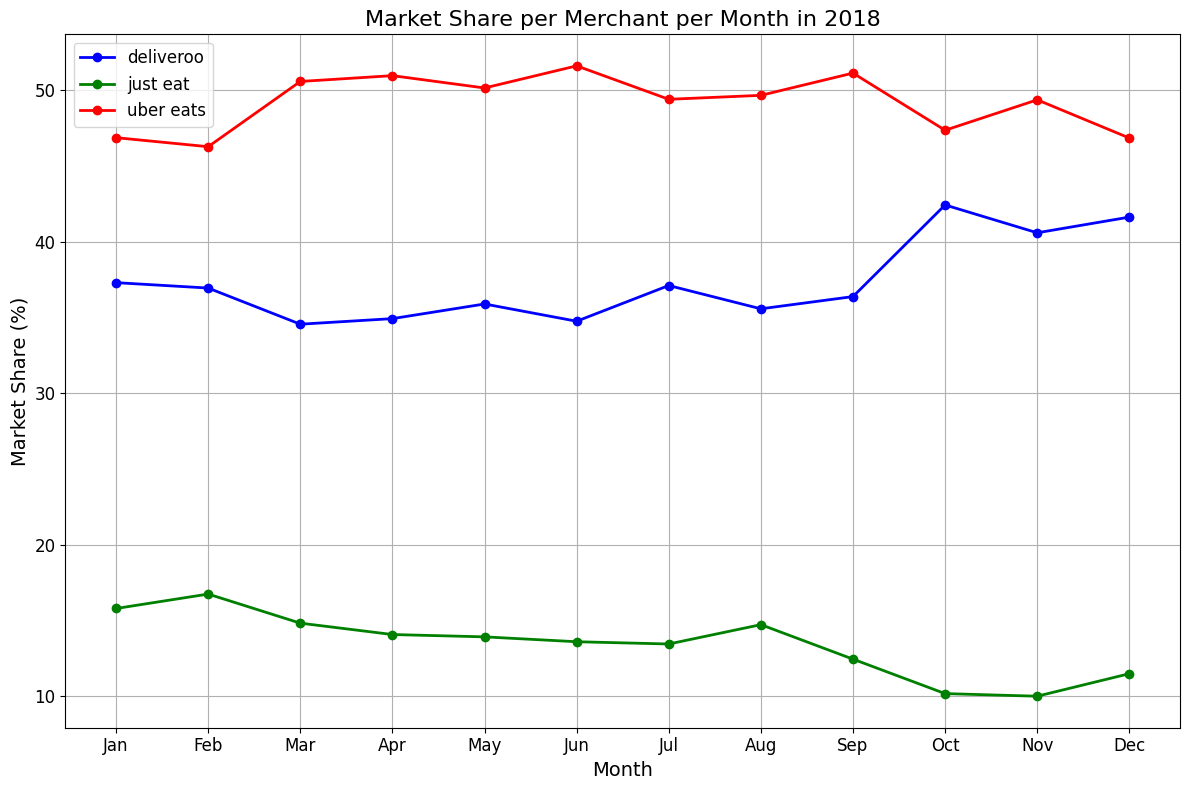

In [238]:
# Filter orders for the year 2018
df_2018 = df_copy[df_copy['order_date'].dt.year == 2018]

# Extract month from order_date
df_2018['order_month'] = df_2018['order_date'].dt.month

# Group by merchant_name and order_month, count the number of orders
market_share = df_2018.groupby(['merchant_name', 'order_month']).size().reset_index(name='order_count')

# Calculate total orders per month
total_orders_per_month = market_share.groupby('order_month')['order_count'].sum()

# Calculate market share as percentage
market_share['market_share_percentage'] = (market_share['order_count'] / market_share['order_month'].map(total_orders_per_month)) * 100

# Get unique merchants
merchants = market_share['merchant_name'].unique()

# Define colors for each merchant
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Plot market share per merchant per month
plt.figure(figsize=(12, 8))

# Iterate over unique merchants
for i, merchant in enumerate(merchants):
    # Filter data for the merchant
    merchant_data = market_share[market_share['merchant_name'] == merchant]
    # Plot market share over months with a different color for each merchant
    plt.plot(merchant_data['order_month'], merchant_data['market_share_percentage'], marker='o', linestyle='-', linewidth=2, label=merchant, color=colors[i])

plt.title('Market Share per Merchant per Month in 2018', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Market Share (%)', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


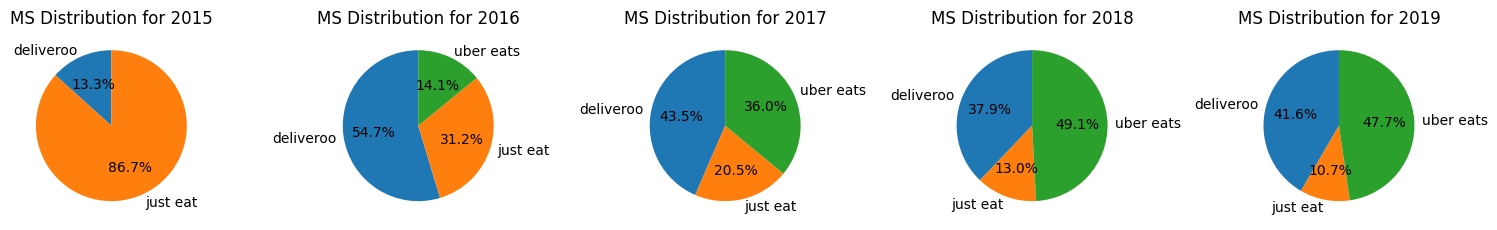

In [239]:
# Extract year from order_date
df_copy['order_year'] = df_copy['order_date'].dt.year

# Group by year and merchant_name, count the number of orders
market_share_year = df_copy.groupby(['order_year', 'merchant_name']).size().reset_index(name='order_count')

# Calculate total orders per year
total_orders_per_year = market_share_year.groupby('order_year')['order_count'].sum()

# Calculate market share as percentage for each year
market_share_year['market_share_percentage'] = (market_share_year['order_count'] / market_share_year.groupby('order_year')['order_count'].transform('sum')) * 100

# Get unique years
years = market_share_year['order_year'].unique()

# Create subplots for each year
fig, axs = plt.subplots(1, len(years), figsize=(15, 5))

for i, year in enumerate(years):
    # Filter data for the year
    year_data = market_share_year[market_share_year['order_year'] == year]
    
    # Data for the pie chart
    sizes = year_data['market_share_percentage']
    labels = year_data['merchant_name']
    
    # Plot the pie chart
    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'MS Distribution for {year}')

plt.tight_layout()
plt.show()


Question 2 :
    2. Define and implement a methodology to identify users that have subscribed to
    "Deliveroo Plus" loyalty program and tag their orders.

In [240]:
df_deliveroo = df_copy[df_copy['merchant_name'] == 'deliveroo'].copy()

In [241]:
df_deliveroo.head()

,id_customer,merchant_name,id_order,order_date,order_total_paid,order_delivery_fee,order_total_promo,order_tip,order_year
2,12,deliveroo,4470,2016-07-26,26.74,2.50,10.0,0.0,2016
3,12,deliveroo,40412038,2019-01-31,31.46,2.19,0.0,0.0,2019
102,54,deliveroo,27437733,2016-06-20,-0.24,2.50,47.5,0.0,2016
114,90,deliveroo,92,2016-07-03,57.28,2.50,0.0,0.0,2016
122,101,deliveroo,53,2017-12-08,14.65,2.50,0.0,0.0,2017


In [242]:
df_deliveroo['order_normal_price'] = df_deliveroo['order_total_paid'] - df_deliveroo['order_delivery_fee'] + df_deliveroo['order_total_promo']

In [243]:
df_deliveroo_2018plus_fee0 = df_deliveroo[(df_deliveroo['order_date'] >= '2018-09-01') & (df_deliveroo['order_delivery_fee'] == 0)]

In [244]:
df_deliveroo.describe()

,id_customer,id_order,order_date,order_total_paid,order_delivery_fee,order_total_promo,order_tip,order_year,order_normal_price
count,2.854180e+05,2.854180e+05,285418,285418.000000,285418.000000,285418.000000,285418.000000,285418.000000,285418.000000
mean,1.108764e+06,2.610007e+07,2018-03-09 23:30:00.971207168,26.094497,2.229847,0.543957,0.210687,2017.702279,24.408607
min,1.200000e+01,5.300000e+01,2015-04-11 00:00:00,-0.990000,0.000000,0.000000,0.000000,2015.000000,-0.990000
25%,1.412150e+05,1.014911e+07,2017-07-30 00:00:00,16.850000,2.500000,0.000000,0.000000,2017.000000,15.050000
50%,9.864560e+05,3.142085e+07,2018-05-25 00:00:00,22.500000,2.500000,0.000000,0.000000,2018.000000,20.690000
75%,2.192864e+06,3.878411e+07,2018-11-27 00:00:00,31.980000,2.500000,0.000000,0.000000,2018.000000,30.020000
max,2.385106e+06,4.620295e+07,2019-04-01 00:00:00,646.350000,6.500000,64.400000,11.000000,2019.000000,643.850000
std,9.247653e+05,1.519890e+07,NaN,14.861533,0.956431,2.455424,0.616726,0.920372,14.592702


In [245]:
co_mat = pd.crosstab(df_deliveroo_2018plus_fee0.order_delivery_fee, df_deliveroo_2018plus_fee0.order_normal_price.astype(int))
co_mat

order_normal_price,0,1,2,3,4,5,6,7,8,9,...,152,154,161,166,168,171,179,184,191,226
order_delivery_fee,,,,,,,,,,,,,,,,,,,,,
0.0,192,76,1,1,103,208,360,555,712,1101,...,1,1,1,1,1,1,1,1,1,1


<Axes: xlabel='order_normal_price', ylabel='order_delivery_fee'>

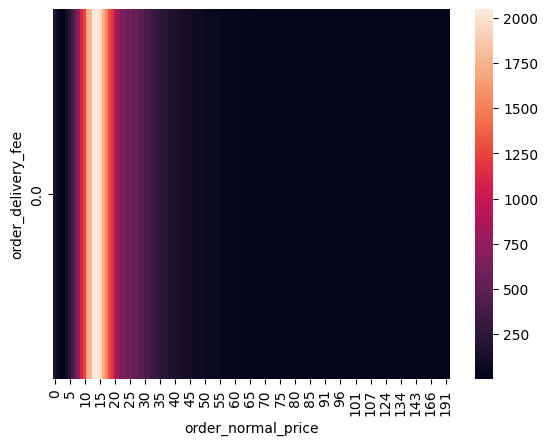

In [246]:
sns.heatmap(co_mat)

In [247]:
df_deliveroo['deliveroo_plus'] = ((df_deliveroo['order_date'] >= '2018-09-01') & (df_deliveroo['order_normal_price'] >= 12) & (df_deliveroo['order_delivery_fee'] == 0)).astype(int)
df_deliveroo


,id_customer,merchant_name,id_order,order_date,order_total_paid,order_delivery_fee,order_total_promo,order_tip,order_year,order_normal_price,deliveroo_plus
2,12,deliveroo,4470,2016-07-26,26.74,2.50,10.0,0.0,2016,34.24,0
3,12,deliveroo,40412038,2019-01-31,31.46,2.19,0.0,0.0,2019,29.27,0
102,54,deliveroo,27437733,2016-06-20,-0.24,2.50,47.5,0.0,2016,44.76,0
114,90,deliveroo,92,2016-07-03,57.28,2.50,0.0,0.0,2016,54.78,0
122,101,deliveroo,53,2017-12-08,14.65,2.50,0.0,0.0,2017,12.15,0
...,...,...,...,...,...,...,...,...,...,...,...
702377,2385102,deliveroo,46187127,2017-05-21,19.35,2.50,0.0,0.0,2017,16.85,0
702378,2385102,deliveroo,46187136,2017-04-06,35.63,2.50,0.0,0.0,2017,33.13,0
702379,2385102,deliveroo,46187159,2017-01-24,30.96,2.50,0.0,0.0,2017,28.46,0
702380,2385102,deliveroo,46187189,2016-11-08,28.64,2.50,0.0,1.0,2016,26.14,0


In [248]:
flagged_orders = df_deliveroo[df_deliveroo['deliveroo_plus'] == 1]
flagged_orders

,id_customer,merchant_name,id_order,order_date,order_total_paid,order_delivery_fee,order_total_promo,order_tip,order_year,order_normal_price,deliveroo_plus
1126,742,deliveroo,27302506,2018-10-02,15.56,0.0,0.0,0.0,2018,15.56,1
1127,742,deliveroo,30134054,2018-10-30,36.18,0.0,0.0,0.0,2018,36.18,1
1128,742,deliveroo,31304028,2018-11-06,15.02,0.0,0.0,0.0,2018,15.02,1
1129,742,deliveroo,32299573,2018-11-19,17.37,0.0,0.0,0.0,2018,17.37,1
1130,742,deliveroo,32365383,2018-11-23,27.14,0.0,0.0,0.0,2018,27.14,1
...,...,...,...,...,...,...,...,...,...,...,...
700060,2381029,deliveroo,45171617,2018-10-10,12.83,0.0,0.0,0.0,2018,12.83,1
700224,2381216,deliveroo,45184297,2018-11-25,12.36,0.0,0.0,0.0,2018,12.36,1
700407,2382067,deliveroo,45290718,2018-12-18,34.27,0.0,0.0,1.0,2018,34.27,1
701018,2383431,deliveroo,46181326,2018-10-13,27.60,0.0,0.0,0.0,2018,27.60,1


In [249]:
flagged_orders.to_csv('deliveroo_plus_orders.csv', index=False)